# Machine Learning Project - 2: Handwritten Letter Classification Challenge

Train a machine learning model to classify any 10 letters from one of the Indian languages. The project involves the following steps;

# 1. Collect images of handwritten letters of one of the Indian languages 
I collected handwritten images of 4 differenct alphabets of  Urdu language.Collected numerous picture of those alphabets and now we will create a model to decide if it can guess whichclass(the froup of same letter )out alphabet belongs to.

In [1]:
# Import classifiers and performance metrics
import numpy as np
import pandas as pd
import itertools

import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import EarlyStopping
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

import seaborn as sns
import matplotlib.pyplot as plt

import os

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve 
from sklearn.metrics import det_curve 
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.image as im

#pip install opencv-python
import cv2
import glob

In [2]:
PIXELS = 50                     # Macro defining number of pixels
DIMENSIONS = PIXELS * PIXELS    # Defining a resolution for the sample images
TESTING_SIZE = 0.20            # By convention 30% of dataset will be used for testing

dataset_alif = []               # List declared to store image vectors of alif
dataset_bay = []                # List declared to store image vectors of bay
dataset_Jeem = []               # List declared to store image vectors of jeem
dataset_daal = []               # List declared to store image vectors of daal

images_of_alif = 0              # To keep track of number of alif images read from folder
images_of_bay = 0               # To keep track of number of bay images read from folder
images_of_Jeem = 0              # To keep track of number of jeem images read from folder
images_of_daal = 0              # To keep track of number of daal images read from folder

# Reading images of alif from the folder

In [3]:
df = pd.read_csv("/home/user548/Desktop/IA_ML_2_202100703_ML_30122022/IA 2FINAL SUBMISSION/data.csv")

In [4]:
# reading images of alif from the folder
for filename in os.listdir("/home/user548/Desktop/IA_ML_2_202100703_ML_30122022/IA 2FINAL SUBMISSION/dataset/Alif"):
    
    img=cv2.imread(f"/home/user548/Desktop/IA_ML_2_202100703_ML_30122022/IA 2FINAL SUBMISSION/dataset/Alif/{filename}", cv2.IMREAD_GRAYSCALE)

    cv2.imwrite(f"/home/user548/Desktop/IA_ML_2_202100703_ML_30122022/IA 2FINAL SUBMISSION/dataset/Alif/{filename}" , img)
 
    img_50x50 = cv2.resize(img,(PIXELS,PIXELS))
    img_instance = img_50x50.flatten()  

    if DIMENSIONS != img_instance.size:
        print("image pixel error") 
    
    dataset_alif.append(img_instance) 
    images_of_alif = images_of_alif + 1


    # Generating matrix from list
data1 = np.empty([images_of_alif, DIMENSIONS], dtype = list)
for i in range(images_of_alif):
    data1[i] = dataset_alif[i]

    

# Reading images of bay from the folder

In [5]:

for filename in os.listdir("/home/user548/Desktop/IA_ML_2_202100703_ML_30122022/IA 2FINAL SUBMISSION/dataset/Bay"):
    
    img=cv2.imread(f"/home/user548/Desktop/IA_ML_2_202100703_ML_30122022/IA 2FINAL SUBMISSION/dataset/Bay/{filename}", cv2.IMREAD_GRAYSCALE) 
    
    cv2.imwrite(f"/home/user548/Desktop/IA_ML_2_202100703_ML_30122022/IA 2FINAL SUBMISSION/dataset/Bay/{filename}", img)

    img_50x50 = cv2.resize(img,(PIXELS,PIXELS))
    img_instance = img_50x50.flatten() 

    if DIMENSIONS != img_instance.size:
        print("image pixel error")
    
    dataset_bay.append(img_instance) 
    images_of_bay = images_of_bay + 1

# Generating matrix from list
data2 = np.empty([images_of_bay, DIMENSIONS], dtype = list)
for i in range(images_of_bay):
    data2[i] = dataset_bay[i]


# Reading images of daal from the folder

In [6]:
for filename in os.listdir("/home/user548/Desktop/IA_ML_2_202100703_ML_30122022/IA 2FINAL SUBMISSION/dataset/Daal"):
    
    img=cv2.imread(f"/home/user548/Desktop/IA_ML_2_202100703_ML_30122022/IA 2FINAL SUBMISSION/dataset/Daal/{filename}", cv2.IMREAD_GRAYSCALE) 
    
    cv2.imwrite(f"/home/user548/Desktop/IA_ML_2_202100703_ML_30122022/IA 2FINAL SUBMISSION/dataset/Daal/{filename}", img)

    img_50x50 = cv2.resize(img,(PIXELS,PIXELS))
    img_instance = img_50x50.flatten() 

    if DIMENSIONS != img_instance.size:
        print("image pixel error")
    
    dataset_daal.append(img_instance) 
    images_of_daal = images_of_daal + 1

# Generating matrix from list
data3 = np.empty([images_of_daal, DIMENSIONS], dtype = list)
for i in range(images_of_daal):
    data3[i] = dataset_daal[i]    

# Reading images of jeem from the folder

In [7]:
for filename in os.listdir("/home/user548/Desktop/IA_ML_2_202100703_ML_30122022/IA 2FINAL SUBMISSION/dataset/Jeem"):
    
    img=cv2.imread(f"/home/user548/Desktop/IA_ML_2_202100703_ML_30122022/IA 2FINAL SUBMISSION/dataset/Jeem/{filename}", cv2.IMREAD_GRAYSCALE) 
    
    cv2.imwrite(f"/home/user548/Desktop/IA_ML_2_202100703_ML_30122022/IA 2FINAL SUBMISSION/dataset/Jeem/{filename}", img)

    img_50x50 = cv2.resize(img,(PIXELS,PIXELS))
    img_instance = img_50x50.flatten() 

    if DIMENSIONS != img_instance.size:
        print("image pixel error")
    
    dataset_Jeem.append(img_instance) 
    images_of_Jeem = images_of_Jeem + 1

# Generating matrix from list
data4 = np.empty([images_of_Jeem, DIMENSIONS], dtype = list)
for i in range(images_of_Jeem):
    data4[i] = dataset_Jeem[i]    

In [8]:
# Determining total number of image instances 
instances = images_of_alif + images_of_bay + images_of_Jeem + images_of_daal
instances
print("Total Instances in the data set:", instances)
print("Total Features or Dimension of data set:" , DIMENSIONS)

Total Instances in the data set: 2000
Total Features or Dimension of data set: 2500


In [9]:
# Stacking the individual matrices
x = np.concatenate((data1, data2, data3, data4))

# Generating the data matrix
print("My X matrix of order", x.shape, "is given as follows: ", x)

My X matrix of order (2000, 2500) is given as follows:  [[255 255 255 ... 255 255 255]
 [252 207 253 ... 255 255 255]
 [255 253 253 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 253]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 246 250 247]]


In [10]:
# Generating tags for the instances
tag_alif = np.full((images_of_alif, 1), 1, dtype=int)
tag_bay = np.full((images_of_bay, 1), 2, dtype=int)
tag_jeem = np.full((images_of_Jeem, 1), 3, dtype=int)
tag_daal = np.full((images_of_daal, 1), 4, dtype=int)

In [11]:
# Generating the tag vector
tag_vector = np.concatenate((tag_alif,tag_bay,tag_jeem,tag_daal))
print("My tags are:", tag_vector)

My tags are: [[1]
 [1]
 [1]
 ...
 [4]
 [4]
 [4]]


In [12]:
# Converting vector to 1D array
y = np.ravel(tag_vector, order='A')

# 2. Split the data into train and test tests (80% train and 20% test)

In [13]:
# Splitting data for testing and training
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = TESTING_SIZE)

In [14]:
scalar = StandardScaler()
X_train_scalar = scalar.fit_transform(X_train)
X_test_scalar = scalar.transform(X_test)

# 4. Train a classification model using neural networks and support vector machines on the training data

# SGDClassifier

In [15]:
 #!pip install sklearn

Stochastic Gradient Descent Classifier: AUROC = 0.500
Accuracy score of Stochastic Gradient Descent Classifier 0.77
Classification report for Stochastic Gradient Descent Classifier SGDClassifier(loss='modified_huber'):
              precision    recall  f1-score   support

           1       0.79      0.71      0.74       109
           2       0.83      0.84      0.83        99
           3       0.59      0.68      0.63        92
           4       0.89      0.85      0.87       100

    accuracy                           0.77       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.78      0.77      0.77       400




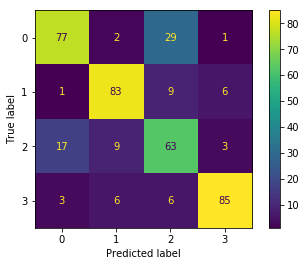

In [16]:
model_5 = SGDClassifier(loss='modified_huber')
model_5.fit(X_train_scalar, y_train)
predictions = model_5.predict(X_test_scalar)

sgdc_probs = model_5.predict_proba(X_test)
sgdc_auc = roc_auc_score(y_test, sgdc_probs, multi_class='ovr')


print("Stochastic Gradient Descent Classifier: AUROC = %.3f" %(sgdc_auc))

print("Accuracy score of Stochastic Gradient Descent Classifier" , accuracy_score(y_test, predictions))
print(
    f"Classification report for Stochastic Gradient Descent Classifier {model_5}:\n"
    f"{classification_report(y_test, predictions)}\n"
)
confusion_matrix1  =confusion_matrix(y_test, predictions)
display = ConfusionMatrixDisplay(confusion_matrix1).plot()
plt.show()

Model_5_report = classification_report(y_test, predictions, output_dict=True)
model_5_df = pd.DataFrame(Model_5_report).transpose()

plt.show() 

# SVM CLASSIFIER


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SVM Classifier: AUROC = 0.894
Accuracy score of SVM Classifier: 0.7
Classification report for SVM Classifier LinearSVC(max_iter=1500):
              precision    recall  f1-score   support

           1       0.76      0.58      0.66       109
           2       0.73      0.77      0.75        99
           3       0.53      0.77      0.63        92
           4       0.88      0.70      0.78       100

    accuracy                           0.70       400
   macro avg       0.72      0.70      0.70       400
weighted avg       0.73      0.70      0.70       400




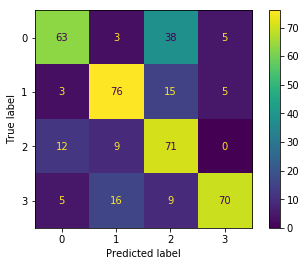

In [18]:
model_2 = LinearSVC(max_iter=1500, multi_class='ovr')
model_2.fit(X_train, y_train)

predictions = model_2.predict(X_test)
svc_probs = model_2._predict_proba_lr(X_test)

svc_auc = roc_auc_score(y_test, svc_probs, multi_class='ovr')
print("SVM Classifier: AUROC = %.3f" %(svc_auc))
print("Accuracy score of SVM Classifier:" , accuracy_score(y_test, predictions))
print(
    f"Classification report for SVM Classifier {model_2}:\n"
    f"{classification_report(y_test, predictions)}\n"
)

confusion_matrix2  =confusion_matrix(y_test, predictions)
display = ConfusionMatrixDisplay(confusion_matrix2).plot()
plt.show()

Model_2_report = classification_report(y_test, predictions, output_dict=True)
model_2_df = pd.DataFrame(Model_5_report).transpose()

plt.show() 

# Convolutional neural networks (CNNs)

In [20]:
from tensorflow.keras.utils import to_categorical
print('Training data shape : ', X_train.shape, y_train.shape)
print('Testing data shape : ',  X_test.shape, y_test.shape)

Training data shape :  (1600, 2500) (1600,)
Testing data shape :  (400, 2500) (400,)


In [21]:
# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  4
Output classes :  [1 2 3 4]


also, these images have a dimension of 50*50. As a result, you'll need to preprocess the data before you feed it into the model.
As a first step, convert each 50*50 image of the train and test set into a matrix of size 28 x 28 x 1 which is fed into the network.

In [22]:
X_train = X_train.reshape(-1,50,50, 1)
X_test = X_test.reshape(-1,50,50, 1)
X_train.shape, X_test.shape

((1600, 50, 50, 1), (400, 50, 50, 1))

The data right now is in an int8 format, so before you feed it into the network you need to convert its type to float32, and you also have to rescale the pixel values in range 0 - 1 inclusive. So let's do that!

In [23]:
X_train = X_train.astype('float32')
X_test= X_test.astype('float32')
X_train = X_train /50.
X_test = X_test /50.

Now ,Converting the class labels into a one-hot encoding vector.
In one-hot encoding,we convert the categorical data into a vector of numbers. The reason why we convert the categorical data in one hot encoding is that machine learning algorithms cannot work with categorical data directly. You generate one boolean column for each category or class. Only one of these columns could take on the value 1 for each sample. Hence, the term one-hot encoding.

For this problem statement, the one hot encoding will be a row vector, and for each image The important thing to note here is that the vector consists of all zeros except for the class that it represents

So let's convert the training and testing labels into one-hot encoding vectors:

In [24]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(y_train)
test_Y_one_hot = to_categorical(y_test)

# Display the change for category label using one-hot encoding
print('Original label:', y_train[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 1
After conversion to one-hot: [0. 1. 0. 0. 0.]


For the model to generalize well, split the training data into two parts, one designed for training and another one for validation. In this case, train the model on 80\% of the training data and validate it on 20\% of the remaining training data. This will also help to reduce overfitting since ,I will be validating the model on the data it would not have seen in training phase, which will help in boosting the test performance.

In [25]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(X_train, train_Y_one_hot, test_size=0.2, random_state=13)

In [26]:
#For one last time let's check the shape of training and validation set.

train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((1280, 50, 50, 1), (320, 50, 50, 1), (1280, 5), (320, 5))

In [27]:
#Model the Data
#First, let's import all the necessary modules required to train the model.

import keras
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU



using a batch size of 64 using a higher batch size of 128 or 256 is also preferable it all depends on the memory. It contributes massively to determining the learning parameters and affects the prediction accuracy.Will train the network for 20 epochs.

In [28]:
batch_size = 64
epochs = 20
num_classes = 5

# 6.Fine tune the parameters to increase the classification accuracies of the model on training and test data.

In [29]:
# without dropout layers to help in case of overfitting
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(50,50,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))   
model.add(Dense(num_classes, activation='softmax'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 50, 50, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 25, 25, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 128)       7

In [31]:
# we added dropout layers to help in case of overfitting
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(50,50,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))   
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

In [40]:
#Compile the Model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer= tf.keras.optimizers.Adam(),metrics=['accuracy'])


Visualizing the layers that were created in the above step by using the summary function. This will show some parameters (weights and biases) in each layer and also the total parameters in your model

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 50, 50, 32)        320       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 50, 50, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 25, 25, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)       

#Train the Model


Finally,train the model with Keras' fit() function! 

The model trains for 20 epochs. The fit() function will return a history object; By storying the result of this function in fashion_train, you can use it later to plot the accuracy and loss function plots between training and validation which will help  to analyze model's performance visually.

In [42]:
mtrain = model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Epoch 1/20
20/20 [==============================] - 13s 606ms/step - loss: 0.0573 - accuracy: 0.9789 - val_loss: 0.0097 - val_accuracy: 0.9937
Epoch 2/20
20/20 [==============================] - 11s 548ms/step - loss: 0.0527 - accuracy: 0.9844 - val_loss: 0.0293 - val_accuracy: 0.9906
Epoch 3/20
20/20 [==============================] - 11s 544ms/step - loss: 0.0473 - accuracy: 0.9852 - val_loss: 0.0135 - val_accuracy: 0.9937
Epoch 4/20
20/20 [==============================] - 11s 551ms/step - loss: 0.0514 - accuracy: 0.9836 - val_loss: 0.0282 - val_accuracy: 0.9937
Epoch 5/20
20/20 [==============================] - 11s 546ms/step - loss: 0.0577 - accuracy: 0.9812 - val_loss: 0.0106 - val_accuracy: 0.9969
Epoch 6/20
20/20 [==============================] - 11s 543ms/step - loss: 0.0195 - accuracy: 0.9914 - val_loss: 0.0171 - val_accuracy: 0.9937
Epoch 7/20
20/20 [==============================] - 11s 563ms/step - loss: 0.0165 - accuracy: 0.9945 - val_loss: 0.0014 - val_accuracy: 1.0000

Finally! We trained the model on urdu handwriting for 20 epochs, and by observing the training accuracy and loss, you can say that the model did a good job since after 20 epochs the training accuracy is 99% and the training loss is quite low (5.2598e-04).

However, it looks like the model is overfitting, as the validation loss is 0.0258 and the validation accuracy is 92%. 

Overfitting gives an intuition that the network has memorized the training data very well but is not guaranteed to work on unseen data, and that is why there is a difference in the training and validation accuracy.

We addedd dropout layer to handle overfitting.

But first, let's evaluate the performance of your model on the test set before you come on to a conclusion.

# 5. Validate the model on the test data 

In [43]:
#Model Evaluation on the Test Set
test_eval = model.evaluate(X_test, test_Y_one_hot, verbose=0)


In [44]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])


Test loss: 0.1089424192905426
Test accuracy: 0.9800000190734863


The test accuracy looks impressive. It turns out that your classifier does better than the benchmark of an SVM classifier with mean accuracy of is 0.725 and benchmark of an Gradient boosting classifier with mean accuracy of is 0.7975.

Let's put your model evaluation into perspective and plot the accuracy and loss plots between training and validation data:

In [46]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])


In [47]:
mtrain_dropout = model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data 
                           =(valid_X, valid_label))


Epoch 1/20
20/20 [==============================] - 12s 576ms/step - loss: 0.0062 - accuracy: 0.9977 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 2/20
20/20 [==============================] - 11s 531ms/step - loss: 0.0124 - accuracy: 0.9969 - val_loss: 0.0038 - val_accuracy: 0.9969
Epoch 3/20
20/20 [==============================] - 10s 522ms/step - loss: 0.0181 - accuracy: 0.9969 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 4/20
20/20 [==============================] - 10s 519ms/step - loss: 0.0124 - accuracy: 0.9961 - val_loss: 0.0107 - val_accuracy: 0.9937
Epoch 5/20
20/20 [==============================] - 11s 535ms/step - loss: 0.0267 - accuracy: 0.9914 - val_loss: 0.0069 - val_accuracy: 0.9969
Epoch 6/20
20/20 [==============================] - 10s 520ms/step - loss: 0.0207 - accuracy: 0.9891 - val_loss: 0.0277 - val_accuracy: 0.9875
Epoch 7/20
20/20 [==============================] - 10s 522ms/step - loss: 0.0089 - accuracy: 0.9977 - val_loss: 1.7871e-04 - val_accuracy: 1.

In [48]:
predicted_classes = model.predict(X_test)

Since the predictions are floating point values, it will not be feasible to compare the predicted labels with true test labels. So, we will round off the output which will convert the float values into an integer. Further,we  will use np.argmax() to select the index number which has a higher value in a row.

For example, let's assume a prediction for one test image to be 0 1 0 0 0 0 0 0 0 0, the output for this should be a class label 1.

In [49]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


In [50]:
predicted_classes.shape, y_test.shape


((400,), (400,))

In [51]:
correct = np.where(predicted_classes==y_test)[0]
print("Found %d correct labels" % len(correct))

Found 389 correct labels


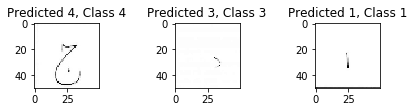

In [52]:
for i, correct in enumerate(correct[:3]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(50,50), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct],y_test[correct]))
    plt.tight_layout()


Found 11 incorrect labels


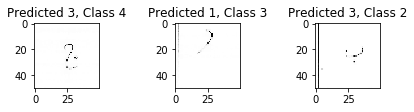

In [53]:
incorrect = np.where(predicted_classes!=y_test)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:3]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(50,50), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.tight_layout()

By looking at a few images,I wasnot sure as to why our model was not able to classify the above images correctly, but it seems like a variety of the similar patterns present on multiple classes affect the performance of the classifier although CNN is a robust architecture.

# Classification Report
Classification report will help us in identifying the misclassified classes in more detail.We will be able to observe for which class the model performed bad out of the given 4 classes.

In [54]:
binencoder = LabelBinarizer()
y = binencoder.fit_transform(y)

In [56]:
num_classes = 4
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.98      1.00      0.99       109
     Class 1       1.00      0.97      0.98        99
     Class 2       0.91      0.98      0.94        92
     Class 3       1.00      0.94      0.97       100

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



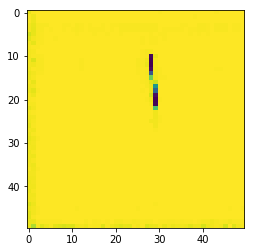

In [62]:
X_images = X_train.reshape((-1,50,50))

plt.imshow(X_images[1108])
plt.show()

In [63]:
imgTrans = X_images[110].reshape(-1,50,50,1)
predictions = model.predict(imgTrans)
binencoder.classes_[np.argmax(predictions)]

IndexError: index 4 is out of bounds for axis 0 with size 4

In [ ]:
#that mean the letter belongs to class 2 